In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('insurance.csv')

Dataset dedicated to cost of treatment of different patients

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [8]:
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)
#smoker or not
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

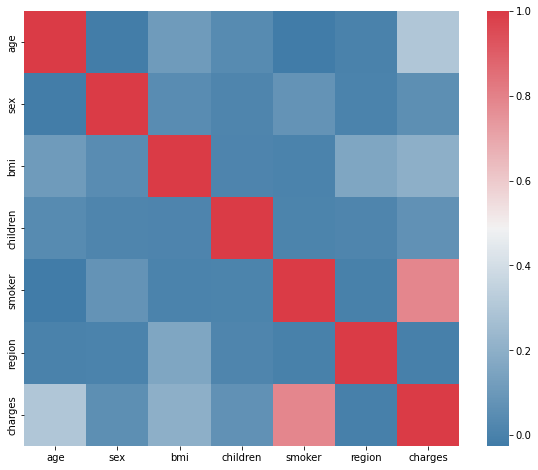

In [11]:
f, ax = pl.subplots(figsize = (10, 8))
corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(240, 10, as_cmap = True),
           square = True, ax = ax)

There is a strong correlation with smoking. So lets investigate further.

In [14]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
p = figure(title="Distribution of charges",tools="save",
            background_fill_color="#E8DDCB")
hist, edges = np.histogram(data.charges)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'

Loading BokehJS ...

In [16]:
show(gridplot([p],ncols = 2, width=400, height=400, toolbar_location=None))

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

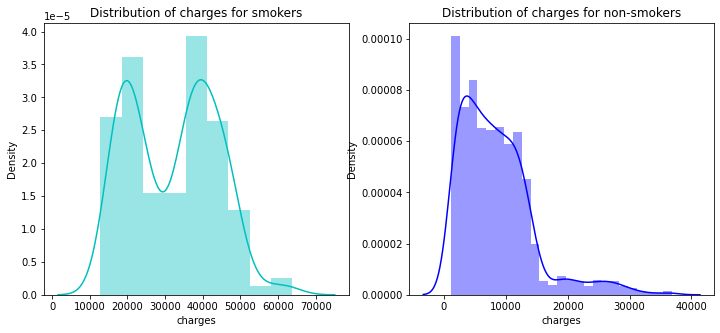

In [17]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Smoking patients spend more on treatment. Lets check if number of non-smoking patients are more

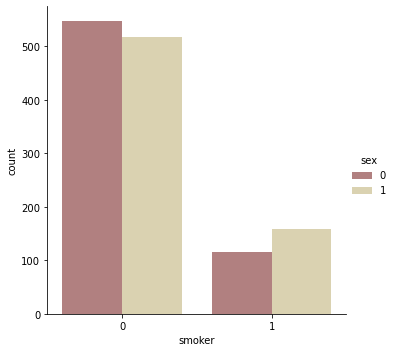

In [18]:
sns.catplot(x = 'smoker', kind = 'count', hue = 'sex', palette = 'pink', data = data)

It can be seen that there are more non-smoking peple than smoking people. Additionally, it can be noticed that there are more male smokers than female. It can be assumed that total cost of treatment for men will be higher than women.

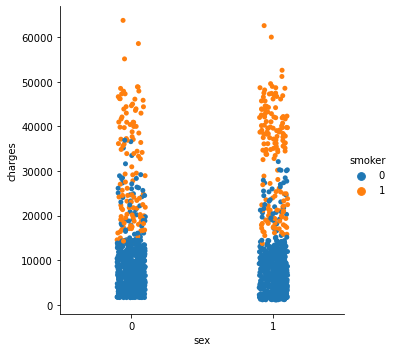

In [34]:
sns.catplot(x = 'sex', y = 'charges', hue = 'smoker',
            data = data)

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

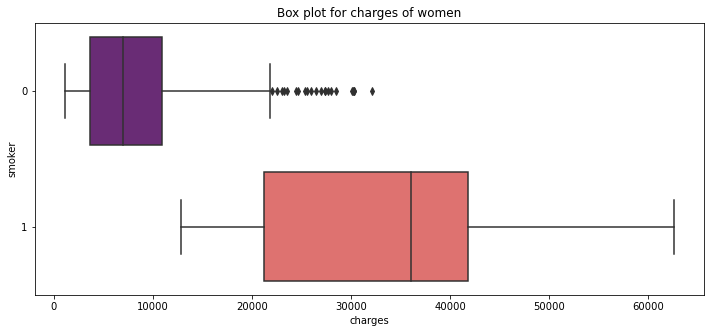

In [37]:
pl.figure(figsize = (12, 5))
pl.title("Box plot for charges of women")
sns.boxplot(y = 'smoker', x = 'charges', data = data[(data.sex == 1)], orient = 'h', palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

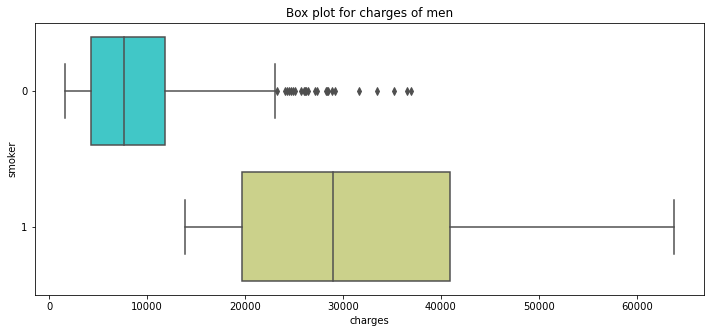

In [40]:
pl.figure(figsize = (12, 5))
pl.title("Box plot for charges of men")
sns.boxplot(y = 'smoker', x = 'charges', data = data[(data.sex == 0)], orient = 'h', palette = 'rainbow')

It is contrary to our assumption, men's treatment cost more than women's.

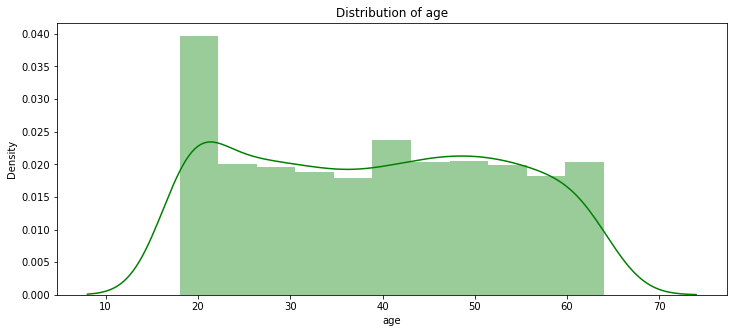

In [41]:
pl.figure(figsize = (12, 5))
pl.title("Distribution of age")
ax = sns.distplot(data['age'], color = 'g')

The patients are around 18-64 years old in our dataset. Lets further look whether there are smokers among 18 year old patients.

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

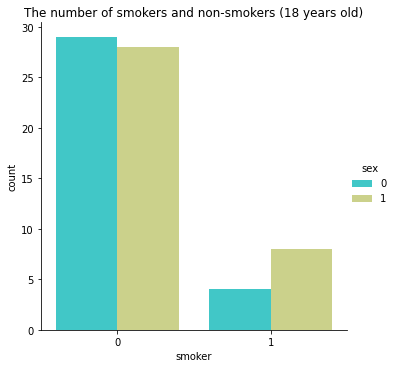

In [43]:
sns.catplot(x = 'smoker', kind = 'count', hue = 'sex', palette = 'rainbow', data = data[(data.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")

It can be seen that percentage of smokers among 18 years old is almost similar to entire dataset.

#### Does smoking affect the cost of treatment at this age?

<AxesSubplot:title={'center':'Cost of treatment for 18 years old smokers '}, xlabel='charges', ylabel='smoker'>

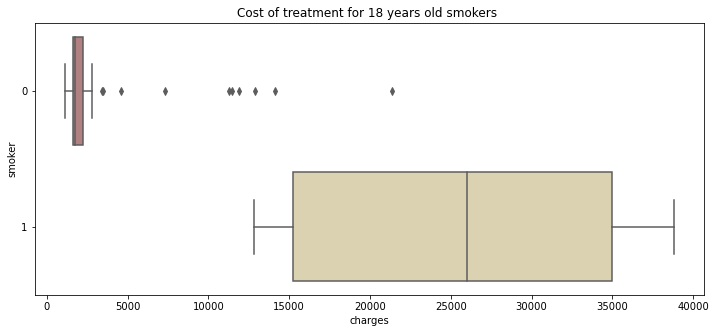

In [44]:
pl.figure(figsize = (12, 5))
pl.title("Cost of treatment for 18 years old smokers ")
sns.boxplot(y = 'smoker', x = 'charges', data = data[(data.age == 18)], orient = 'h', palette = 'pink')

According to our data, there is a huge difference between cost of treatment for smokers and non-smokers even at the age of 18 years old.

#### How cost of treatment is related to the age of smoker and non-smoker patients?

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

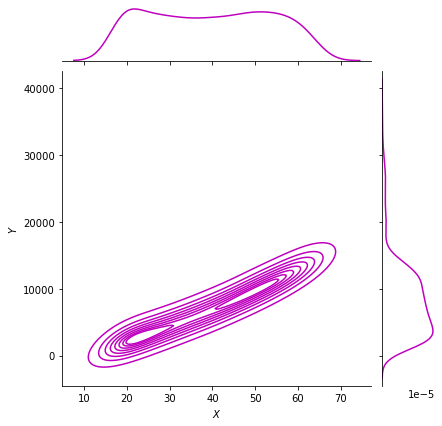

In [50]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)], kind = 'kde', color="m")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker = '+')
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

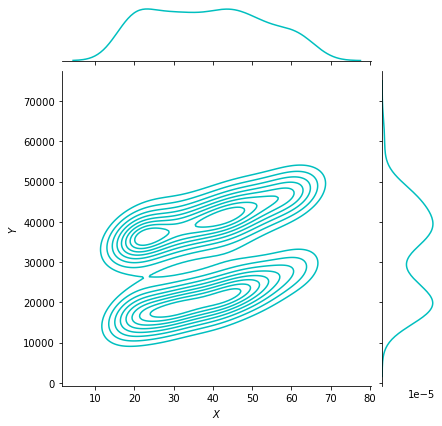

In [51]:
g = sns.jointplot(x = 'age', y = 'charges', data = data[(data.smoker == 1)], kind = 'kde', color = 'c')
g.plot_joint(pl.scatter, c = 'w', s = 30, linewidth = 1, marker = '+')
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('$X$', '$Y$')
ax.set_title("Distribution of charges and age for smokers")

In [53]:
#non-smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 0)].age,y=data[(data.smoker == 0)].charges, size=7, line_color="navy", 
         fill_color="pink", fill_alpha=0.9)

show(p)

In [55]:
#smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 1)].age,y=data[(data.smoker == 1)].charges, size=7, 
         line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

Text(0.5, 1.0, 'Smokers and non-smokers')

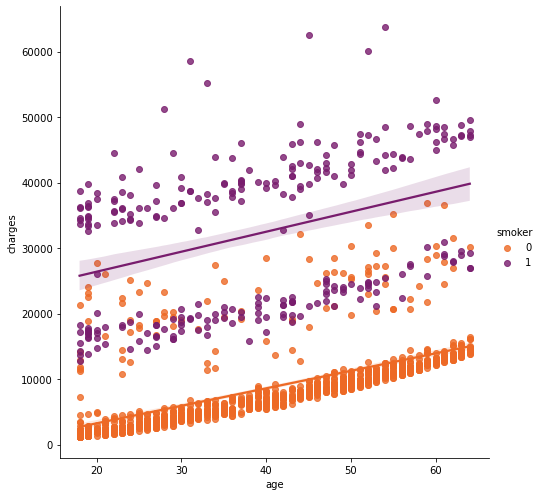

In [56]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

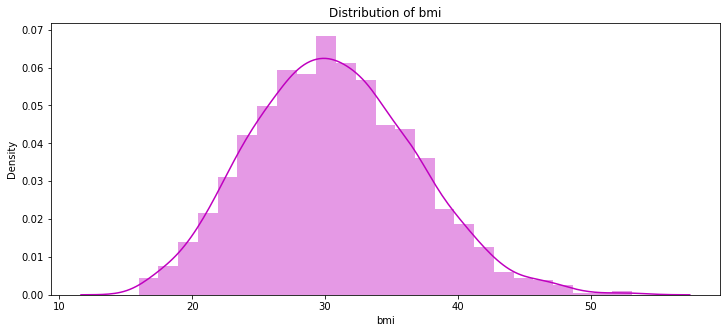

In [58]:
# Distribution of BMI
pl.figure(figsize = (12, 5))
pl.title("Distribution of bmi")
ax = sns.distplot(data['bmi'], color = 'm')

Surprisingly, the average of the bmi of all patients is 30. 

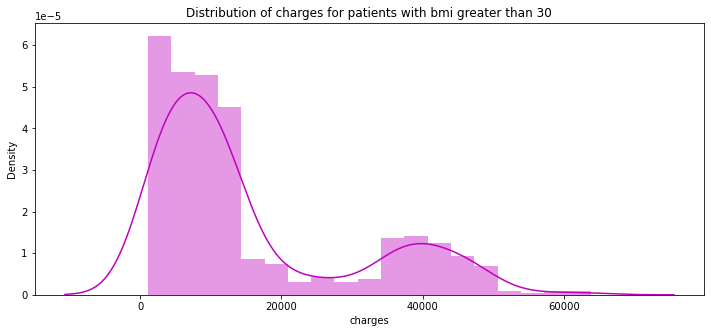

In [60]:
pl.figure(figsize = (12, 5))
pl.title("Distribution of charges for patients with bmi greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

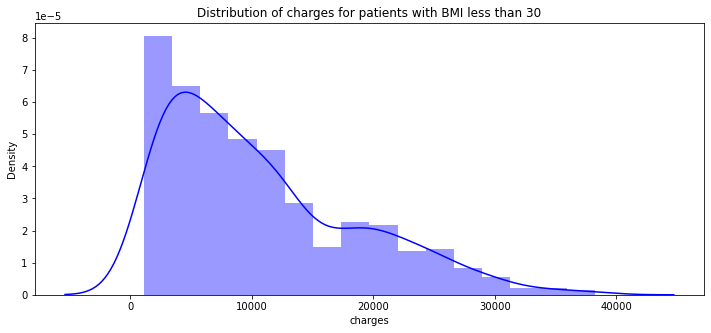

In [61]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Patients with bmi above 30 spend more on treatment

Text(0.5, 1.0, 'Distribution of bmi and charges')

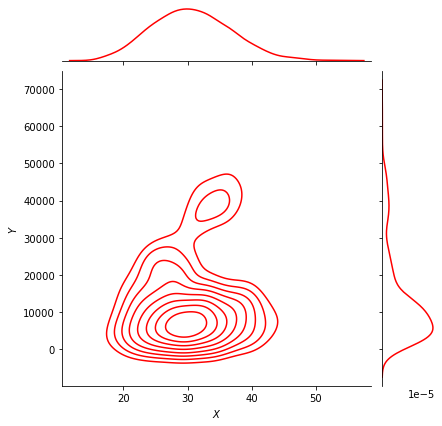

In [62]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

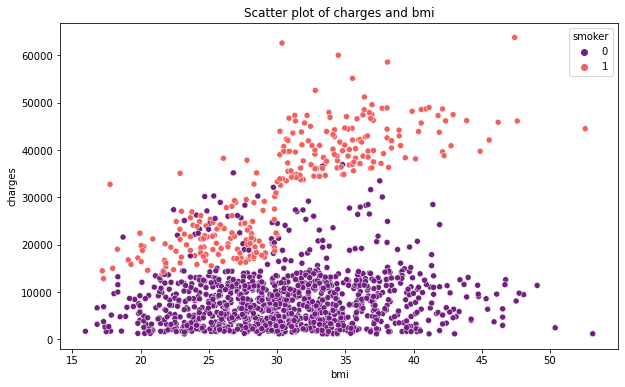

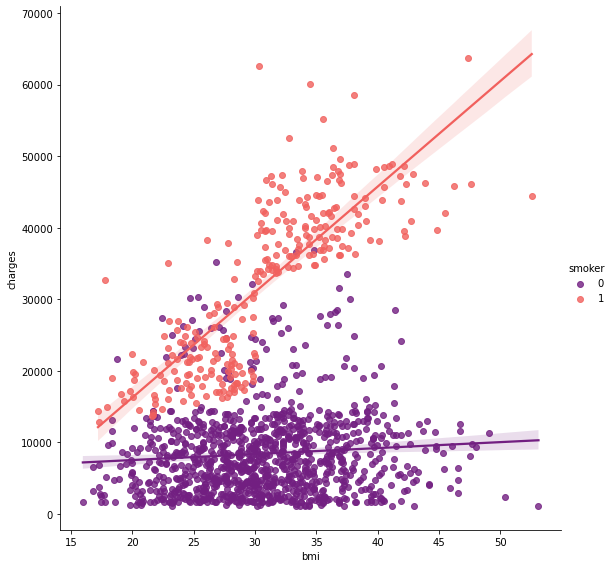

In [66]:
pl.figure(figsize = (10, 6))
ax = sns.scatterplot(x = 'bmi', y = 'charges', data = data, palette = 'magma', hue = 'smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x = 'bmi', y = 'charges', hue = 'smoker', data = data, palette = 'magma', size = 8)